In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/companies_msme_region_oked.csv')

df['default_ratio'] = df['bads'] / df['borrowers']
df.head(5)

,msme_segment,region,oked,observation_date,borrowers,bads,default_ratio
0,medium,ANDIJON VILOYATI,01131,2024-01-01,1,0,0.0
1,medium,ANDIJON VILOYATI,01131,2024-02-01,1,0,0.0
2,medium,ANDIJON VILOYATI,01131,2024-03-01,1,0,0.0
3,medium,ANDIJON VILOYATI,01131,2024-04-01,1,0,0.0
4,medium,ANDIJON VILOYATI,01131,2024-05-01,1,0,0.0


C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_33988\3901336434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='region', y='default_ratio', palette='coolwarm')


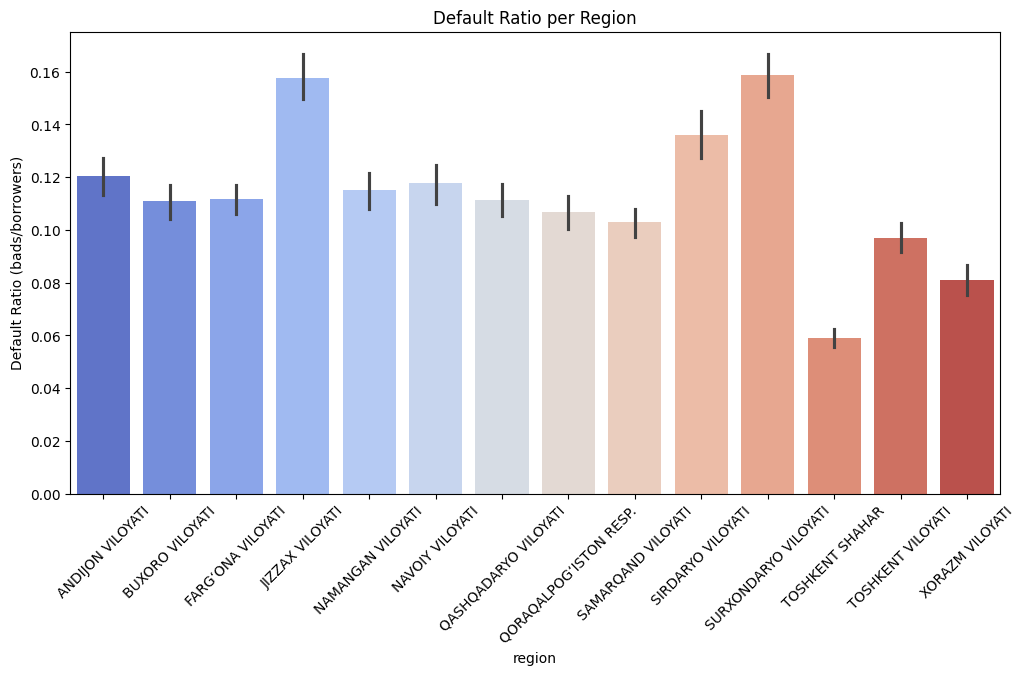

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='region', y='default_ratio', palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel("Default Ratio (bads/borrowers)")
plt.title("Default Ratio per Region")
plt.show()

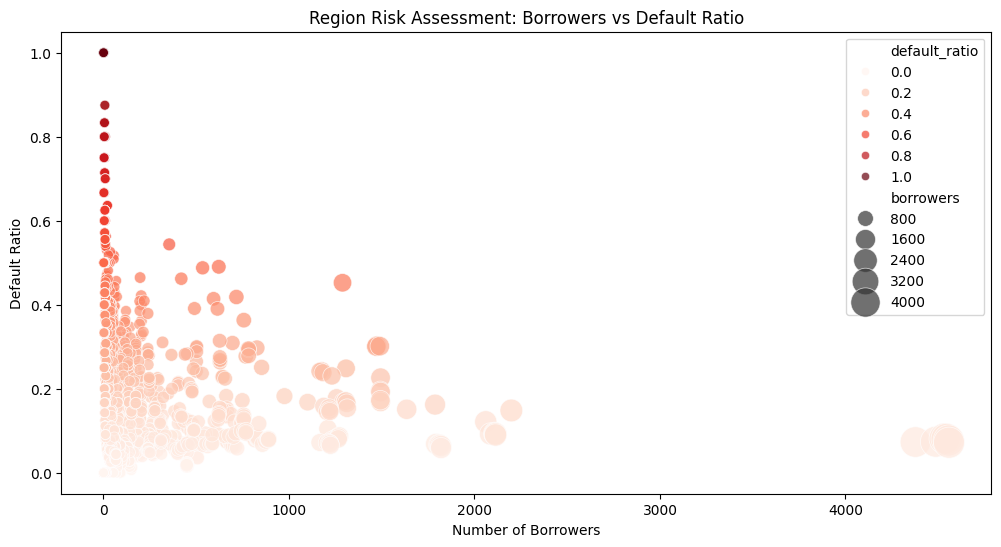

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='borrowers',
    y='default_ratio',
    size='borrowers',
    hue='default_ratio',
    palette='Reds',
    sizes=(50, 500),
    alpha=0.7
)
plt.xlabel("Number of Borrowers")
plt.ylabel("Default Ratio")
plt.title("Region Risk Assessment: Borrowers vs Default Ratio")
plt.show()


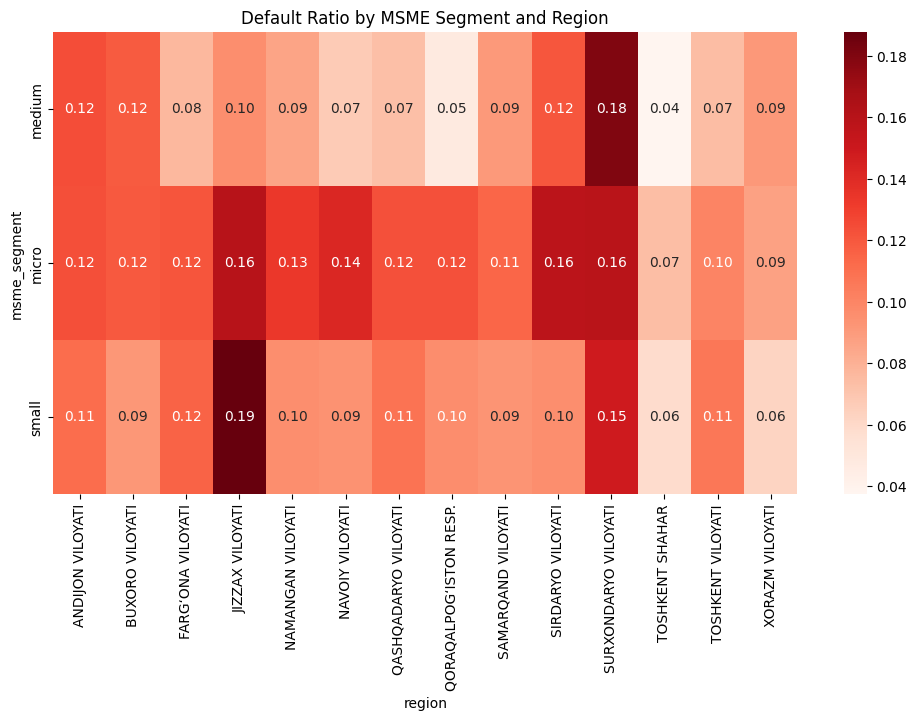

In [26]:
pivot = df.pivot_table(values='default_ratio', index='msme_segment', columns='region')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Reds')
plt.title("Default Ratio by MSME Segment and Region")
plt.show()


### Regions

In [28]:
region_grouped = df.groupby('region').agg({
    'borrowers': 'sum',
    'bads': 'sum'
}).reset_index()

region_grouped['default_ratio'] = region_grouped['bads'] / region_grouped['borrowers']

top_risky = region_grouped.nlargest(5, 'default_ratio')
print("Top Risky Regions:")
print(top_risky)

top_safe = region_grouped.nsmallest(5, 'default_ratio')
print("\nTop Safe Regions:")
print(top_safe)

Top Risky Regions:
                  region  borrowers  bads  default_ratio
0       ANDIJON VILOYATI      54545  8430       0.154551
3        JIZZAX VILOYATI      42869  6325       0.147543
5        NAVOIY VILOYATI      38835  5703       0.146852
9      SIRDARYO VILOYATI      26699  3502       0.131166
10  SURXONDARYO VILOYATI      50633  6571       0.129777

Top Safe Regions:
                    region  borrowers  bads  default_ratio
11         TOSHKENT SHAHAR      78114  4545       0.058184
12       TOSHKENT VILOYATI      64814  6658       0.102725
4        NAMANGAN VILOYATI      44223  4623       0.104538
7   QORAQALPOG‘ISTON RESP.      61061  6615       0.108334
8       SAMARQAND VILOYATI      75220  8257       0.109771


### With Segments

In [29]:
segment_grouped = df.groupby('msme_segment').agg({
    'borrowers': 'sum',
    'bads': 'sum'
}).reset_index()

segment_grouped['default_ratio'] = segment_grouped['bads'] / segment_grouped['borrowers']

top_risky_segments = segment_grouped.nlargest(5, 'default_ratio')
print("Top Risky MSME Segments:")
print(top_risky_segments)


Top Risky MSME Segments:
  msme_segment  borrowers   bads  default_ratio
1        micro     627164  75672       0.120657
2        small     145136  15380       0.105970
0       medium      45028   3539       0.078596


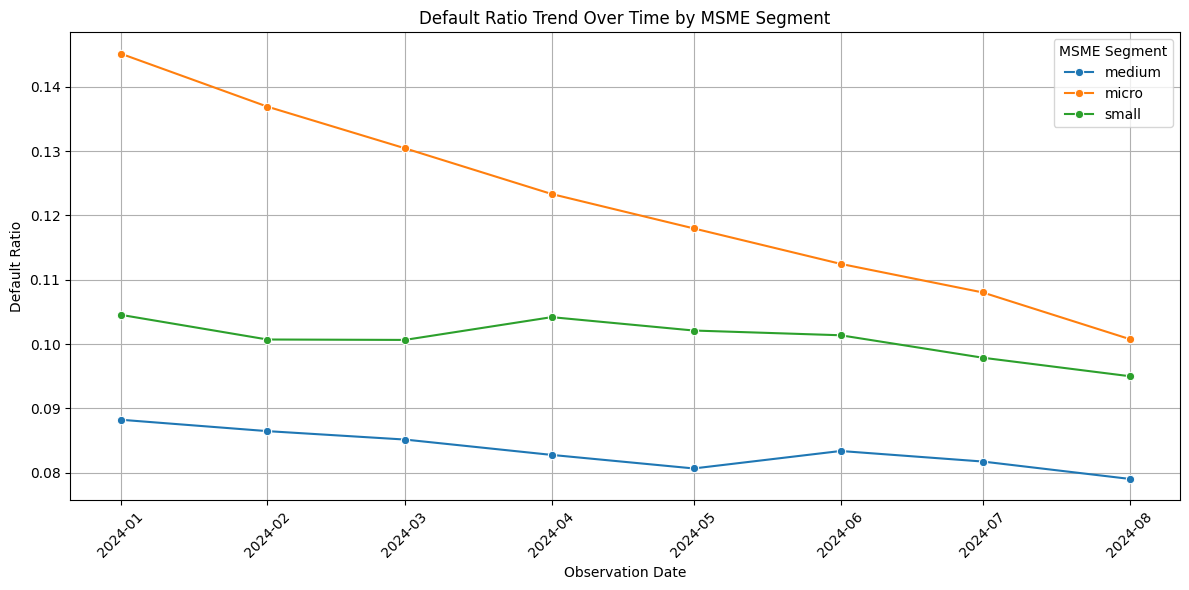

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['observation_date'] = pd.to_datetime(df['observation_date'])

segments = ['small', 'medium', 'micro']
df_filtered = df[df['msme_segment'].isin(segments)]

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_filtered,
    x='observation_date',
    y='default_ratio',
    hue='msme_segment',
    marker='o',
    errorbar=None
)

plt.title('Default Ratio Trend Over Time by MSME Segment')
plt.xlabel('Observation Date')
plt.ylabel('Default Ratio')
plt.xticks(rotation=45)
plt.legend(title='MSME Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


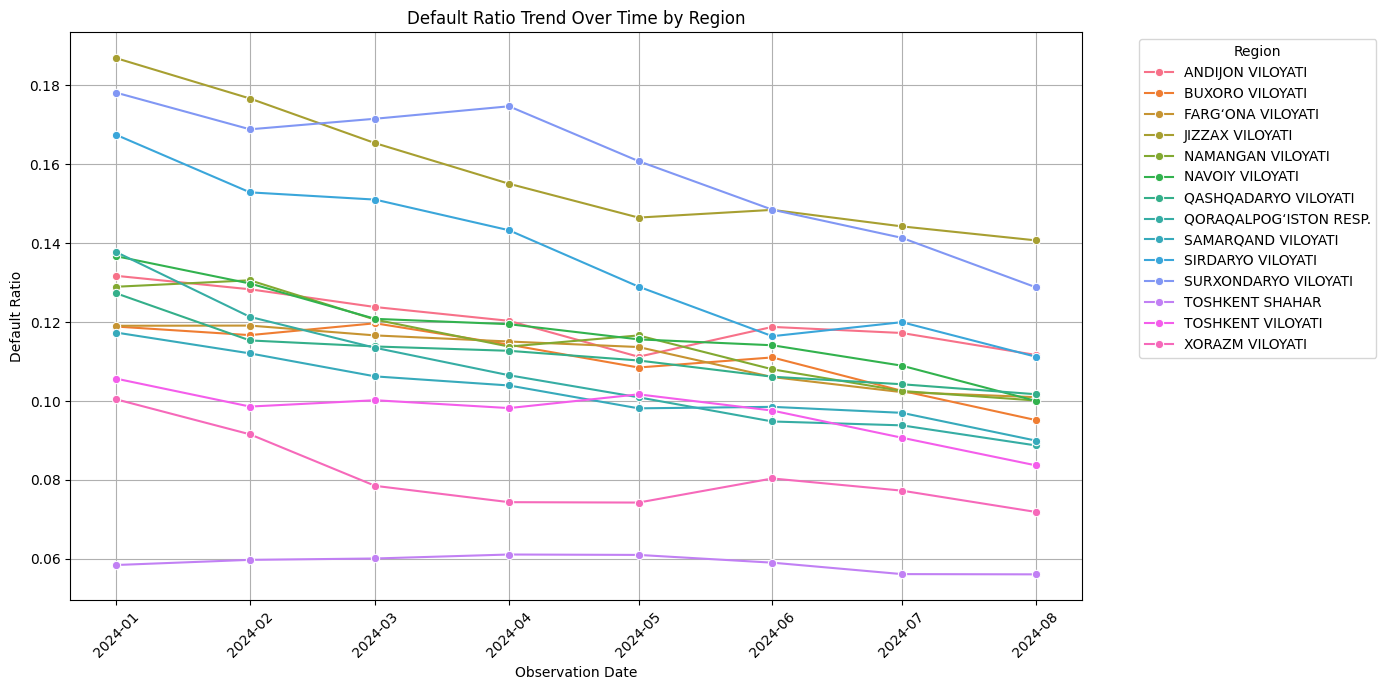

In [39]:
plt.figure(figsize=(14,7))

# Line plot: default_ratio over time for each region
sns.lineplot(
    data=df,
    x='observation_date',
    y='default_ratio',
    hue='region',
    marker='o',
    errorbar=None
)

plt.title('Default Ratio Trend Over Time by Region')
plt.xlabel('Observation Date')
plt.ylabel('Default Ratio')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Individuals

In [ ]:
df_individuals = pd.read_csv('individual_region_oked.csv')
df_individuals.head(5)

,region,oked,observation_date,borrowers,bads
0,Андижон вил.,Ёғочдан тайёрланган халқ ҳунармандчилиги маҳсу...,2024-01-01,38,0
1,Андижон вил.,Ёғочдан тайёрланган халқ ҳунармандчилиги маҳсу...,2024-02-01,38,0
2,Андижон вил.,Ёғочдан тайёрланган халқ ҳунармандчилиги маҳсу...,2024-03-01,38,0
3,Андижон вил.,Ёғочдан тайёрланган халқ ҳунармандчилиги маҳсу...,2024-04-01,38,0
4,Андижон вил.,Ёғочдан тайёрланган халқ ҳунармандчилиги маҳсу...,2024-05-01,38,0


In [ ]:
df_individuals = pd.read_csv('individual_region_oked.csv')

df_individuals['observation_date'] = pd.to_datetime(df_individuals['observation_date'])

df_individuals['default_ratio'] = (
    df_individuals['bads'] / df_individuals['borrowers']
)

df_individuals['msme_segment'] = 'individual'

df_individuals_agg = (
    df_individuals
    .groupby(['observation_date', 'msme_segment'], as_index=False)
    .agg({'default_ratio': 'mean'})
)

df['observation_date'] = pd.to_datetime(df['observation_date'])

segments = ['small', 'medium', 'micro']
df_msme = df[df['msme_segment'].isin(segments)]

df_msme_agg = (
    df_msme
    .groupby(['observation_date', 'msme_segment'], as_index=False)
    .agg({'default_ratio': 'mean'})
)


In [47]:
df_final = pd.concat(
    [df_msme_agg, df_individuals_agg],
    ignore_index=True
)


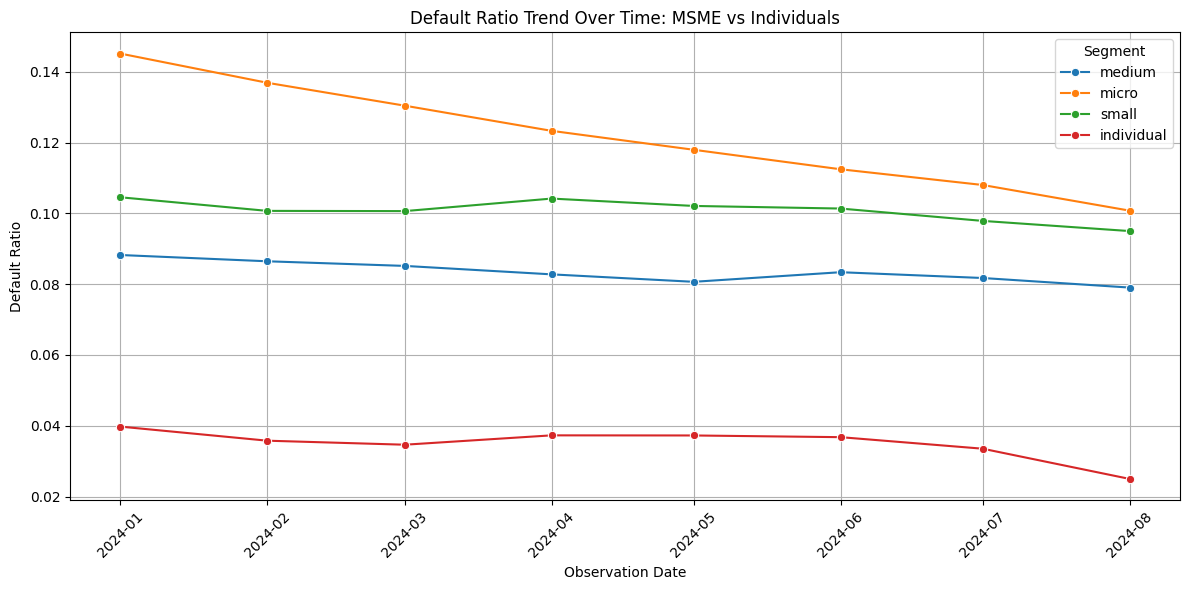

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_final,
    x='observation_date',
    y='default_ratio',
    hue='msme_segment',
    marker='o',
    errorbar=None
)

plt.title('Default Ratio Trend Over Time: MSME vs Individuals')
plt.xlabel('Observation Date')
plt.ylabel('Default Ratio')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()